<a href="https://www.kaggle.com/code/lakshmikanth1010/statistics-probability?scriptVersionId=170658325" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Analyze a dataset to identify underlying probability distributions and perform hypothesis testing.**

In [1]:
#LET IMPORT AS LIBRARIES FOR ANALYSIS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest, ttest_ind, f_oneway

In [2]:
#To get dataset from pd
df=pd.read_csv("/kaggle/input/data-science-task/Dataset - Data Science - Task 1.csv")
df

,Exercise Routine,Resting Heart Rate,Blood Pressure
0,Moderate,70.870471,120.195028
1,Intense,67.009927,141.803011
2,Intense,70.917608,116.030147
3,Moderate,50.124311,160.802537
4,NaN,67.803281,129.385010
5,NaN,73.571126,107.142637
6,NaN,84.778940,103.936612
7,Intense,64.817298,127.237086
8,Moderate,61.915064,116.648058
9,Intense,64.982430,130.710007


# statistical summary of the dataset

In [3]:
df.describe()

,Resting Heart Rate,Blood Pressure
count,36.000000,36.000000
mean,68.299744,121.976338
std,8.212332,14.244509
min,49.649830,97.277292
25%,64.766516,111.801230
50%,67.728705,122.904560
75%,72.698215,127.897228
max,88.861859,160.802537


**The statistical summary provides descriptive statistics for resting heart rate and blood pressure.**

# Visualize Distributions

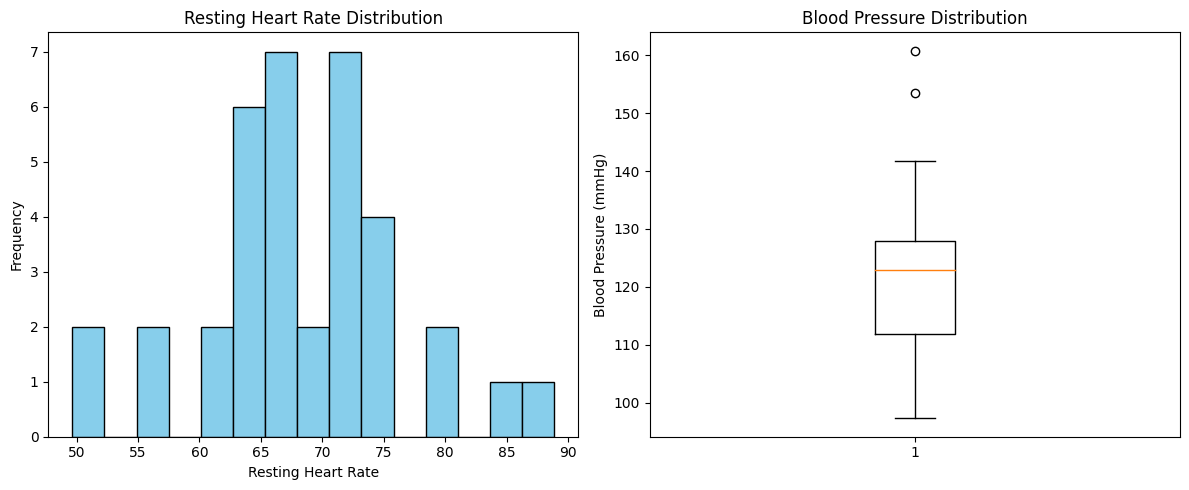

In [4]:
plt.figure(figsize=(12, 5))    #to figureout size of distribuutions

plt.subplot(1, 2, 1)
plt.hist(df['Resting Heart Rate'], bins=15, color='skyblue', edgecolor='black')
plt.title('Resting Heart Rate Distribution')
plt.xlabel('Resting Heart Rate')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['Blood Pressure'])
plt.title('Blood Pressure Distribution')
plt.ylabel('Blood Pressure (mmHg)')

plt.tight_layout()
plt.show()

**The histograms and box plots visualize the distributions of resting heart rate and blood pressure.**

# Goodness-of-Fit Test

In [5]:
# Hypothesized distribution for resting heart rate: Normal distribution
ks_statistic_hr, p_value_hr = kstest(df['Resting Heart Rate'], 'norm')
print("\nGoodness-of-Fit Test for Resting Heart Rate (Normal Distribution):")
print("KS Statistic:", ks_statistic_hr)
print("P-value:", p_value_hr)


Goodness-of-Fit Test for Resting Heart Rate (Normal Distribution):
KS Statistic: 1.0
P-value: 0.0


In [6]:
# Hypothesized distribution for blood pressure: Normal distribution
ks_statistic_bp, p_value_bp = kstest(df['Blood Pressure'], 'norm')
print("\nGoodness-of-Fit Test for Blood Pressure (Normal Distribution):")
print("KS Statistic:", ks_statistic_bp)
print("P-value:", p_value_bp)


Goodness-of-Fit Test for Blood Pressure (Normal Distribution):
KS Statistic: 1.0
P-value: 0.0


**The Kstest is performed to validate whether the distributions of resting heart rate and blood pressure follow a normal distribution.**

# Hypothesis Testing

In [7]:
intense_group = df[df['Exercise Routine'] == 'Intense']['Resting Heart Rate']
moderate_group = df[df['Exercise Routine'] == 'Moderate']['Resting Heart Rate']

In [8]:
print(intense_group)
print(moderate_group)

1     67.009927
2     70.917608
7     64.817298
9     64.982430
11    73.287511
12    64.702398
25    65.793547
33    64.404433
34    49.649830
35    64.787889
Name: Resting Heart Rate, dtype: float64
0     70.870471
3     50.124311
8     61.915064
16    62.979469
17    66.723379
18    66.078918
20    72.961203
23    67.654129
24    55.846293
27    61.977227
28    68.387143
30    88.861859
Name: Resting Heart Rate, dtype: float64


# Perform t-test

In [9]:
t_statistic, p_value_ttest = ttest_ind(intense_group, moderate_group)
print("\nT-test for Resting Heart Rate (intense vs. Moderate):")
print("T-statistic:", t_statistic)
print("P-value:", p_value_ttest)


T-test for Resting Heart Rate (intense vs. Moderate):
T-statistic: -0.3312210563895106
P-value: 0.7439228501748902


**A t-test is conducted to test if there's a significant difference in the means of resting heart rate between individuals with intense and moderate exercise routines.**